# 1

- O GBM cria árvores inteiras, ao contrário do Ada Boost, que cria stumps (Árvore com somente 1 nó de decisão)
- O GBM é um algoritmo que funciona de uma maneira aditiva, enquanto o Ada Boost utiliza a saída de um stump como entrada para o próximo
- O GBM trabalha em cima dos resíduos das variáveis dependentes, enquanto o Ada Boost não
- O GBM Agrega a variável dependente pela média para realizar os cálculos, já o Ada Boost utiliza um sistema de pesos para os cálculos.
- O GBM lida melhor com problemas de overfitting do que o Ada Boost (em um cenário geral)

# 2

No blog do Sklearn eu não consewgui encontrar exatamente os exemplos citados de regressão e classificação, então pedi uma ajudinha para o chatGPT gerar um exemplo para cada um

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset
X, y = load_iris(return_X_y=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.28836337869645623
R^2 Score: 0.7803012822391022


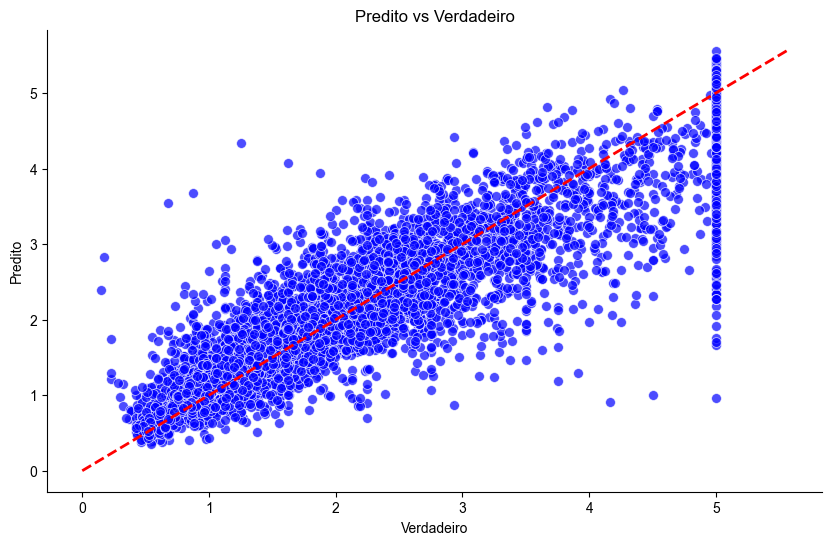

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, s=50, color='b', alpha=0.7)

plt.title('Predito vs Verdadeiro')
plt.xlabel('Verdadeiro')
plt.ylabel('Predito')
max_val = max(max(y_test), max(y_pred))
plt.plot([0, max_val], [0, max_val], 'r--', lw=2)
sns.set_style("whitegrid")
sns.despine()
plt.show()

# 3

- n_estimators: Se trata do número de árvores que serão criadas
- learning_rate: Também chamado de "shrink parameter", se trata do parâmetro que define em que ritmo as árvores irão diminuir o resíduo.
- max_depth: É a profundida máxima das árvores criadas
- min_samples_split: Especifica o número de amostras necessárias para se realizar um split em um dos nós.
- subsample: Indica a fração de amostras que serão utilizadas para fittar cada árvore

# 4

In [11]:
%%time

from sklearn.model_selection import GridSearchCV
import numpy as np

gbr = GradientBoostingRegressor()

params_grid = {
    'n_estimators': list(range(50, 201, 50)),
    'max_depth': list(range(3, 5, 1)),
    'learning_rate': [0.1]
}

grid_search = GridSearchCV(estimator=gbr, param_grid=params_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (Negative MSE):", best_score)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
Best Score (Negative MSE): -0.24309785454140248
Mean Squared Error: 0.23190910301993223
R^2 Score: 0.8233127493481364
CPU times: total: 2min 11s
Wall time: 2min 21s


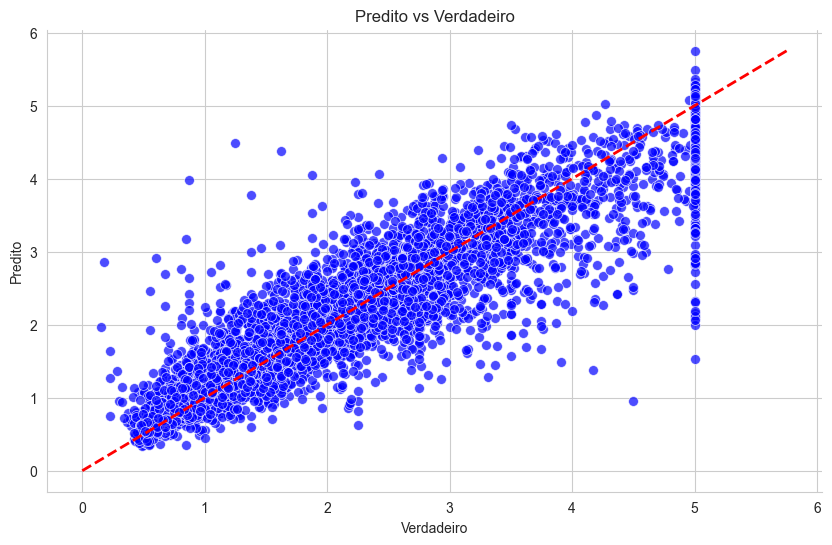

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, s=50, color='b', alpha=0.7)

plt.title('Predito vs Verdadeiro')
plt.xlabel('Verdadeiro')
plt.ylabel('Predito')
max_val = max(max(y_test), max(y_pred))
plt.plot([0, max_val], [0, max_val], 'r--', lw=2)
sns.set_style("whitegrid")
sns.despine()
plt.show()

#### Para o Grid Search, Decidi utilizar esse exemplo do California house prices, já que utilizei ele como exemplo logo no item 2

# 5

A grande diferença entre o Gradient Boosting Machine e o Stochastic GBM é a introdução da aleatoriedade neste segundo. Tal aleatoriedade é introduzida através de amostragens aleatórias a partir das árvores anteriores.